In [1]:
# 19.2.2 - Import Dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

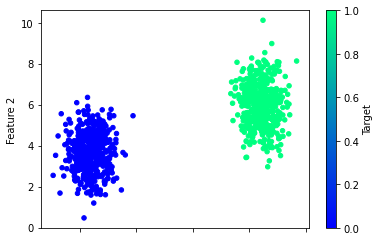

In [2]:
# 19.2.2 - # Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# 19.2.2 - # Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# 19.2.2 - # Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# 19.2.2 - # Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# 19.2.2 - # Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# 19.2.2 - # Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# 19.2.2 - # Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 19.2.2 - # Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# 19.2.3 - # Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.8042 - accuracy: 0.0187
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7889 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7756 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7638 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7534 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7442 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7359 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7285 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7219 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7

24/24 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 1.0000
Epoch 92/100


<AxesSubplot:>

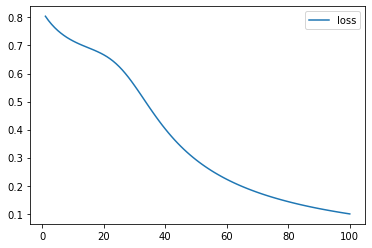

In [11]:
# 19.2.3 - # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

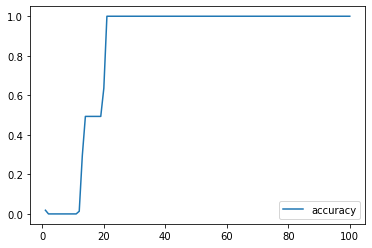

In [12]:
# 19.2.3 - # Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# 19.2.3 - # Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0929 - accuracy: 1.0000 - 202ms/epoch - 25ms/step
Loss: 0.09287464618682861, Accuracy: 1.0


In [14]:
# 19.2.3 - # Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

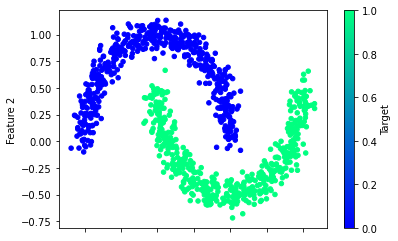

In [15]:
# 19.2.4 - Nuances of Neural Networks on Nonlinear Numbers
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# 19.2.4 - # Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# 19.2.4 - # Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9746 - accuracy: 0.4840
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8904 - accuracy: 0.5040
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8319 - accuracy: 0.5213
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7881 - accuracy: 0.5373
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7576 - accuracy: 0.5520
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7333 - accuracy: 0.5653
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.5747
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5867
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5987
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6080
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8173
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8200
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8213
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8267
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8307
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8320
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8320
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8347
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8373
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8427
Epoch 93/100


<AxesSubplot:>

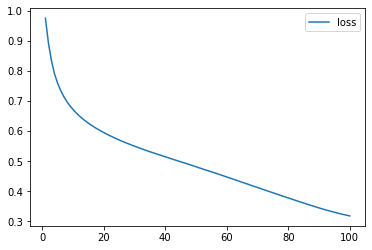

In [18]:
# 19.2.4 - # Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

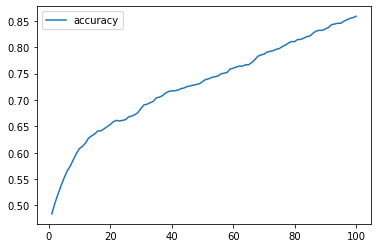

In [19]:
# 19.2.4 - # Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# 19.2.5 - # Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# 19.2.5 - # Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# 19.2.5 - # Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8193 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7682 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7219 - accuracy: 0.5427
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5600
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.5680
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.5547
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.5533
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.5533
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.5840
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.7067
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.8947
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.8947
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8947
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8947
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.8947
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8947
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2436 - accuracy: 0.8933
Epoch 93/100
